In [1]:
import random 
import numpy as np
import pandas as pd
import math

In [98]:
from statistics import mean

In [2]:
links = pd.read_csv('Links.csv')
nodes = pd.read_csv('Places.csv')

In [3]:
links

,Place id(Pont A),Place id(Point B),Means of Transport
0,8441694,9061761,Bus
1,8441694,10381699,Car
2,8611522,8631524,Car
3,8611522,11251704,Rail
4,8631524,9791429,Car
...,...,...,...
355,21121576,21271622,Bike
356,21141652,20331668,Car
357,21271622,21141652,Car
358,51889340,17191741,Ship


In [4]:
nodes

,Name of place,Place ID,Northings Pos,Eastings Pos
0,Whitley Bridge,8441694,53.694,-1.156
1,Doncaster Rail,8611522,53.522,-1.139
2,Doncaster Ctr,8631524,53.524,-1.137
3,Brayton Jct,9061761,53.761,-1.094
4,York Rail,9081958,53.958,-1.092
...,...,...,...,...
212,Hollym Village,20391706,53.706,0.039
213,Spurn Head,21121576,53.576,0.112
214,Easington Village,21141652,53.652,0.114
215,Kilnsea Village,21271622,53.622,0.127


In [5]:
probable_node = random.randint(0,216)#randomly select a place
probable_node

57

In [6]:
nodes.iloc[probable_node][1]

15561685

In [7]:
links.iloc[4][0] #r,c

8631524

In [8]:
nodes.iloc[2][1]#r,c

8631524

In [9]:
nodes.iloc[1][0]#r,c

'Doncaster Rail'

In [10]:
#map_data.iloc[1][1]#r,c


In [11]:
attatched_places = []
distance_array = []
#links
#sqrt(((x1 - x)*(x1 - x)) + ((y1 - y) * (y1 - y)));
for j in range(0,360):
    isFound = False
    for i in range(0,217):
        #Point A
        if links.iloc[j][0] == nodes.iloc[i][1]:
            isFound_A = True
            res1 = nodes.iloc[i][0]
            #print(i,nodes.iloc[i][0])
            #grab xy coordinates
            pointA_X_coordinate = nodes.iloc[i][2]
            pointA_Y_coordinate = nodes.iloc[i][3]
        elif i == 360 and isFound_A == False:
            print('Link A at %j not found')
            break
    for i in range(0,217):
        #Point B
        if links.iloc[j][1] == nodes.iloc[i][1]:
            isFound_B = True
            res2 = nodes.iloc[i][0]
            #print(i,nodes.iloc[i][0])
            pointB_X_coordinate = nodes.iloc[i][2]
            pointB_Y_coordinate = nodes.iloc[i][3]
        elif i == 360 and isFound_B == False:
            print('Link B at %j not found')
            break
    distance = math.sqrt(((pointA_X_coordinate - pointB_X_coordinate)*(pointA_X_coordinate - pointB_X_coordinate)) + ((pointB_Y_coordinate - pointA_Y_coordinate) * (pointB_Y_coordinate - pointA_Y_coordinate)))
    distance_array.append(distance)
    #print(res1, 'to', res2 , 'distance =', distance)

In [ ]:
#distance_dataframe

In [122]:
#distance_array
distance_dataframe = pd.Series(distance_array, name = 'Distance')
#append data to links data
#distance_dataframe = distance_dataframe.reset_index(drop=True)
#links = links.reset_index(drop=True)
#map_data = pd.concat([links, distance_dataframe], axis=1)
frames = [links, distance_dataframe]
map_data = pd.concat([distance_dataframe,links], axis =1)
map_data

,Distance,Place id(Pont A),Place id(Point B),Means of Transport
0,0.091285,8441694,9061761,Bus
1,0.194064,8441694,10381699,Car
2,0.002828,8611522,8631524,Car
3,0.320656,8611522,11251704,Rail
4,0.149937,8631524,9791429,Car
...,...,...,...,...
355,0.048384,21121576,21271622,Bike
356,0.082565,21141652,20331668,Car
357,0.032696,21271622,21141652,Car
358,4.219680,51889340,17191741,Ship


In [16]:
def fitness(route,map_data):
    overallScore = 0
    for i in range(0,len(route)):
        for j in range(0, len(map_data)):
            if route[i] == map_data.iloc[j][1]:
                if i < len(route)-1:
                    if route[i+1]==map_data.iloc[j][2]:
                        distance = map_data.iloc[j][0]
                        #print(distance)
                        overallScore+=distance
                        break
            elif route[i] == map_data.iloc[j][2]:
                if i < len(route)-1:
                    if route[i+1]==map_data.iloc[j][1]:
                        distance = map_data.iloc[j][0]
                        #print(distance)
                        overallScore+=distance
                        break
    return overallScore

In [ ]:
#def canCrossover(a,b):

In [118]:
def crossover(a, b):
    #need 2 crossover m8
    #of the 2, which is the shortest?
    new_a = []
    new_b = []
    print('Pareant a = ', a)
    print('Pareant b = ', b)
    canCross = False
    canProduceOffspring = False
    #should not be start or end point
    temp_a = a[1:len(a)-1]
    temp_b = b[1:len(b)-1]
    print('Slice to check a = ', temp_a)
    print('Slice to check b = ', temp_b)
    for j in range(0,len(temp_a)):
        if temp_a[j] in temp_b:
            canCross = True
            gene_position_b = temp_b.index(temp_a[j])
            gene_position_a = temp_a.index(temp_b[gene_position_b])
            print("gene position at B: ", gene_position_b)
            print("gene position at A: ", gene_position_a)
            break
    if canCross == True:
        #possible cross points
        possible_cross_points = 0
        #index position of possible cross points in both a and b
        possible_positions_a = []
        possible_positions_b = []
        for j in range(0,len(temp_a)):
            if temp_a[j] in temp_b:
                possible_cross_points+=1
                possible_positions_b.append(temp_b.index(temp_a[j]))
                possible_positions_a.append(temp_a.index(temp_b[gene_position_b]))
        print('Possible cross points: ', possible_cross_points)
        print('possible crosses at b: ', possible_positions_b)
        print('Possible crosses at a: ', possible_positions_a)
        #checkValidity = True
        #while(checkValidity):
        #just swap values at that index
        #sooo....
        #pick a random index position
        
        if len(possible_positions_a) > 1:
            cut_pos = random.randint(0,len(possible_positions_a))
        else:
            cut_pos = 0
        print('cut pos', cut_pos)
        #cut_pos = 0
        cut_a = temp_a[possible_positions_a[cut_pos]:len(temp_a)] #cut
        print('cut a: ', cut_a)
        cut_b = temp_b[possible_positions_b[cut_pos]:len(temp_b)] #cut
        print('cut b: ', cut_b)
        cut_a1 = temp_a[:possible_positions_a[cut_pos]]
        print('cut a1: ', cut_a1)
        cut_b1 = temp_b[:possible_positions_b[cut_pos]]
        print('cut b1: ', cut_b1)
        #swap them
        new_a = cut_a1 + cut_b
        new_b = cut_b1 + cut_a
        new_a.insert(0,a[0])
        new_b.insert(0,a[0])
        new_a.append(a[-1])
        new_b.append(a[-1])
        print('new', new_a)
        print('new', new_b)
        #before making effort to crossover
        if len(a) > len(b):
            crossoverThreshold = len(b)
        else:
            crossoverThreshold = len(a)
        #from the shortest, obtain half that, then use it to crossover
        crossoverThreshold = int(0.5*crossoverThreshold)
        print("Max genes to be crossed: ",crossoverThreshold )
        #go to nth index in the longer array and cut
        #for i in range(crossoverThreshold,)
        #need to satisfy 2 conditions to cross, one, is there a similar 'code' and 2, does the created offspring end at desired pos?
    return new_a,new_b,canCross

In [117]:
def mutate(route, probability,places,links):
    if random.random() < probability:
        print('Mutating...')
        start = route[0]
        end = route[-1]
        route = create_random_new_route(places, links, start, end)
    return route

In [12]:
def isANeighbour(node_id1,node_id2,links):
    isTrue = False
    #links
    for i in range(0,360):
        if links.iloc[i][0] == node_id1:
            if links.iloc[i][1] == node_id2:
                isTrue = True
                break
        if links.iloc[i][1] == node_id1:
            if links.iloc[i][0] == node_id2:
                isTrue = True
                break
        if links.iloc[i][0] == node_id2:
            if links.iloc[i][1] == node_id1:
                isTrue = True
                break
        if links.iloc[i][1] == node_id2:
            if links.iloc[i][0] == node_id1:
                isTrue = True
                break
    return isTrue
        

In [17]:
isANeighbour(9791429,10111496,links)

True

In [18]:
def create_random_new_route(places_data, links, start, end):
    #desired start, desired end, net data
    #route has to be valid
    #do not create a route that exceeds size of map(it is possible but this state can run infinitely so...no)
    #soo..i need the IDs First
    route = []
    route.append(start)
    counter = 0
    traverse = True
    while(traverse):
        probable_node = random.randint(0,216)#randomly select a place
        #print('test',probable_node)
        probable_node = places_data.iloc[probable_node][1]  #grab respective node id
        #check if valid route. if yes...append and randomly search for 'end' if not valid, keep searching
        #print('route value', route[-1])
        if isANeighbour(probable_node,route[-1],links) == True:
            #print('accepted',probable_node)
            route.append(probable_node)
        
        if route[-1]==end:
            traverse = False
        counter += 1
    return route

In [21]:
def create_new_generation(size, places_data, links, start, end):
    population = []
    for i in range(0,size):
        population.append(create_random_new_route(places_data, links, start, end))
        print(population[-1])
    return population

In [22]:
#x = create_random_new_route(nodes,links,8631524,8611522 )

In [23]:
new_gen = create_new_generation(4,nodes,links,9791429,10111496)
#new_gen

[9791429, 12271393, 13461591, 12271393, 14521393, 16621388, 14611235, 16621388, 14611235, 16621388, 14611235, 12271393, 9791429, 10111496]
[9791429, 10111496]
[9791429, 10111496]
[9791429, 8631524, 8611522, 8631524, 9791429, 8631524, 9791429, 8631524, 9791429, 10111496]


[[9791429,
  12271393,
  13461591,
  12271393,
  14521393,
  16621388,
  14611235,
  16621388,
  14611235,
  16621388,
  14611235,
  12271393,
  9791429,
  10111496],
 [9791429, 10111496],
 [9791429, 10111496],
 [9791429,
  8631524,
  8611522,
  8631524,
  9791429,
  8631524,
  9791429,
  8631524,
  9791429,
  10111496]]

In [ ]:
new_gen[2]

In [92]:
# i, i+1
m,k,_ =crossover(new_gen[0],new_gen[2])
print(_)

Pareant a =  [9791429, 12271393, 13461591, 12271393, 14521393, 16621388, 14611235, 16621388, 14611235, 16621388, 14611235, 12271393, 9791429, 10111496]
Pareant b =  [9791429, 10111496]
Slice to check a =  [12271393, 13461591, 12271393, 14521393, 16621388, 14611235, 16621388, 14611235, 16621388, 14611235, 12271393, 9791429]
Slice to check b =  []
False


In [95]:
len(nodes)

217

In [99]:
#need to find a way to visualize my stuff
#m is route, and nodes

def get_x_y_plot_path(m,nodes):
    xValues = []
    yValues = []
    nodes.iloc[probable_node][1]
    for i in range(0,len(m)):
        #from id from nodes, grab northing and easting
        for j in range(0, len(nodes)):
            if m[i] == nodes.iloc[j][1]:
                xValues.append(nodes.iloc[j][2])
                yValues.append(nodes.iloc[j][3])
                break
    return xValues,yValues

In [88]:
xValues = []
yValues = []
nodes.iloc[probable_node][1]
for i in range(0,len(k)):
    #from id from nodes, grab northing and easting
    for j in range(0, len(nodes)):
        if k[i] == nodes.iloc[j][1]:
            xValues.append(nodes.iloc[j][2])
            yValues.append(nodes.iloc[j][3])
            break

In [79]:
import seaborn as sns

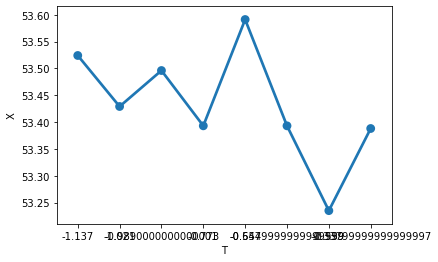

In [87]:
data1 = {'X':xValues,'T':yValues}
df1 = pd.DataFrame(data1)
plt3 = sns.pointplot(x="T", y="X", data=df1) #blue


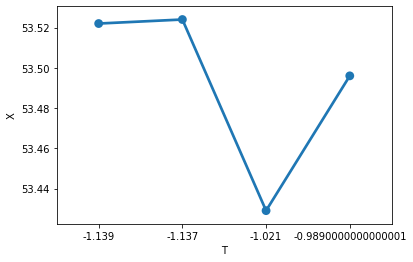

In [89]:
data1 = {'X':xValues,'T':yValues}
df1 = pd.DataFrame(data1)
plt3 = sns.pointplot(x="T", y="X", data=df1) #blue

In [119]:
def main(number_of_generations,initial_population_size,start,end,links,places,map_data,mutation_probability):
    #NOTE: The bigger the population size, the longer it will take to create a starting population. Since the nature of the
    #problem is very specific, creating a random walk in a starting generation to the desired solution may take quite a while 
    #try experimenting with a very small starting population
    i = 0
    #create new population
    print('Creating starting population')
    new_gen = create_new_generation(initial_population_size,places,links,start,end)
    while(i < number_of_generations):
        print('Generation = ', i)
        population_fitness = []
        #breed
        #during breeding, we must make sure if they can crossover first
        #if a specimen cannot breed with any of its mates, remove from population
        next_gen = []
        cannotBreed = True
        #can breed with anyone(first come first serve on compatibility)
        #cannot breed with itself 
        #if someone has breed with another before, they should be removed from list during next search
        iterator_capper = len(new_gen)
        for j in range(0,len(new_gen)):
            if j < len(new_gen)-1:
                gene_iterator = 0
                while(cannotBreed):
                    if gene_iterator < len(new_gen)-1:
                        cross_a,cross_b,breed_status = crossover(new_gen[j],new_gen[gene_iterator+1])
                        if breed_status == True:
                            #print('Breeding')
                            next_gen.append(cross_a)
                            next_gen.append(cross_b)
                            del new_gen[j]
                            del new_gen[gene_iterator+1]
                            cannotBreed = False
                        elif breed_status == False and gene_iterator == len(iterator_capper)-1:
                            print('expired gene')
                            del new_gen[j]
                            cannotBreed = False
                    else:
                        cannotBreed = False
                    gene_iterator+=1
                j+=2
        print('new gen:', new_gen)
        #mutate(depending on mutation probability), basically, some random child within the population is gonna mutate
        #for better, or worse
        #sooo...
        for m in range(0,len(next_gen)):
            mutate(next_gen[m], mutation_probability,places,links)  
        #fitness measurement
        for k in range(0,len(next_gen)):
            population_fitness.append(fitness(next_gen[k],map_data))
        #selectively retain and remove parts of population depending on fitness
        average_fitness = mean(population_fitness)
        #keep to 60
        fitness_threshold = (average_fitness *120)/100
        #any child below threshold is....deleted
        to_be_trimmed = []
        for h in range(0,len(population_fitness)):
            if population_fitness < fitness_threshold:
                del next_gen[h]
        #plot random child
        plot_x,plot_y = get_x_y_plot_path(next_gen[random.randint(0,len(next_gen)-1)],places)
        #draw
        data1 = {'X':plot_x,'T':plot_y}
        df1 = pd.DataFrame(data1)
        plt3 = sns.pointplot(x="T", y="X", data=df1) #blue
        #rebuild population if less than a certain threshold
        pop_inc = abs(len(initial_population_size) - len(next_gen))
        print('pop diff')
        if len(next_gen) < initial_population_size:
            for p in range(0,len(pop_inc)):
                print('Create new pop')
                next_gen.append(create_random_new_route(places, links, start, end))
            #generate new members
        new_gen = next_gen 
        #repeat
        i+=1

In [ ]:
main(10,4,9791429,10111496,links,nodes,map_data,0.5)
#9791429,10111496

Creating starting population
[9791429, 8631524, 9791429, 8631524, 8611522, 13491586, 8611522, 13491586, 8611522, 8631524, 10351609, 10381699, 10351609, 10381699, 8441694, 9061761, 8441694, 10381699, 8441694, 8631524, 8441694, 9061761, 8441694, 9061761, 9611790, 11321746, 12351837, 13341864, 14671957, 13341864, 14671957, 14262019, 12872098, 14202070, 14262019, 14202070, 12872098, 14202070, 12872098, 14202070, 15602006, 16842053, 15602006, 14671957, 13341864, 13991769, 14311740, 14271730, 14971722, 14271730, 14311740, 13991769, 14311740, 13991769, 13341864, 13991769, 14311740, 13991769, 14271730, 14971722, 14931717, 14211727, 14931717, 15581717, 15651723, 15581717, 16541744, 16531745, 16561743, 16421744, 16371735, 16421744, 16071745, 15991745, 16071745, 16421744, 16071745, 15991745, 16071745, 16081741, 16001737, 15971732, 16011730, 16121732, 16371735, 16561741, 16371735, 16121732, 16011730, 15941726, 15971732, 15831726, 15651723, 15831726, 15891736, 15651732, 15891736, 16001737, 16081741

In [ ]:
#initialise(0.4,4)

In [ ]:
#I need to "write" down the map....
#route = np.zeros(1,dtype=int)
#route

In [ ]:
#distance_array[-1]

In [ ]:
#distance_array

In [ ]:
#map_data

In [ ]:
#map_data.iloc[1][2]

In [ ]:
#x[0]

In [ ]:
#fitness(x,map_data)

In [ ]:
#len(x)

In [ ]:
#i

In [120]:
random.random()

0.3979005944650895